In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, MeanShift

In [4]:
iris = pd.read_csv("Iris.csv")

In [6]:
iris.drop("Id",inplace=True, axis=1)

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
X = iris.drop("Species",axis=1)

In [9]:
from sklearn.decomposition import PCA 

In [10]:
X.shape

(150, 4)

In [34]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=42, init="k-means++")

In [36]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [37]:
kmeans_pred = kmeans.fit_predict(X)

In [38]:
import matplotlib.pyplot as plt

In [39]:
kmeans_pred.shape

(150,)

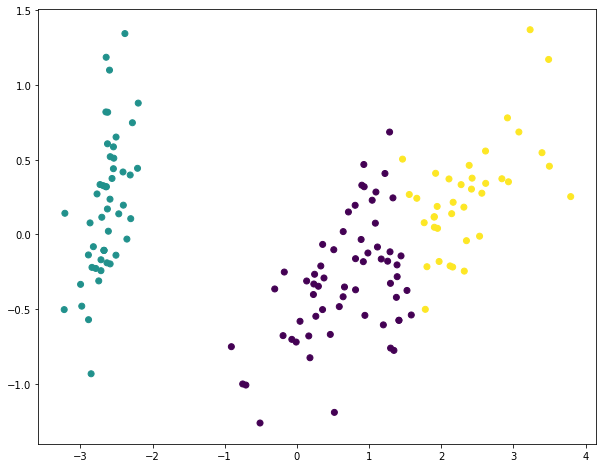

In [41]:
plt.figure(figsize=(10,8))
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = kmeans_pred)

In [42]:
dbs = DBSCAN()

In [43]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [44]:
dbs_pred = dbs.fit_predict(X)

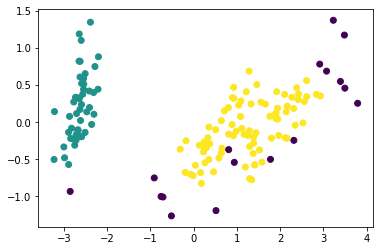

In [45]:
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = dbs_pred)

In [54]:
mshift = MeanShift()

In [55]:
mshift.fit(X)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

In [56]:
pred_msh = mshift.fit_predict(X)

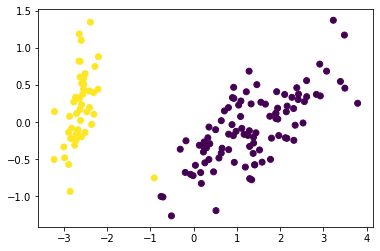

In [57]:
plt.scatter(pca_feat[:,0], pca_feat[:,1], c = pred_msh)